In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\Farzana Saif\\Downloads\\salaries.csv")
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Analysing the Data

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
yrs.since.phd,397.0,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,397.0,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
salary,397.0,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


In [4]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [5]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
data.shape

(397, 6)

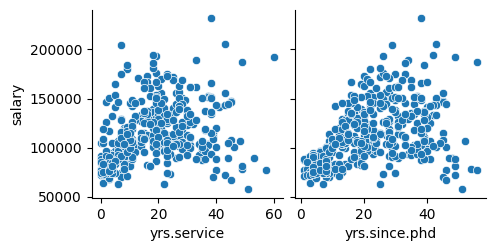

In [7]:
#Plotting Continuous

sns.pairplot( data = data,
             y_vars = ['salary'],
             x_vars= ['yrs.service', 'yrs.since.phd'] )

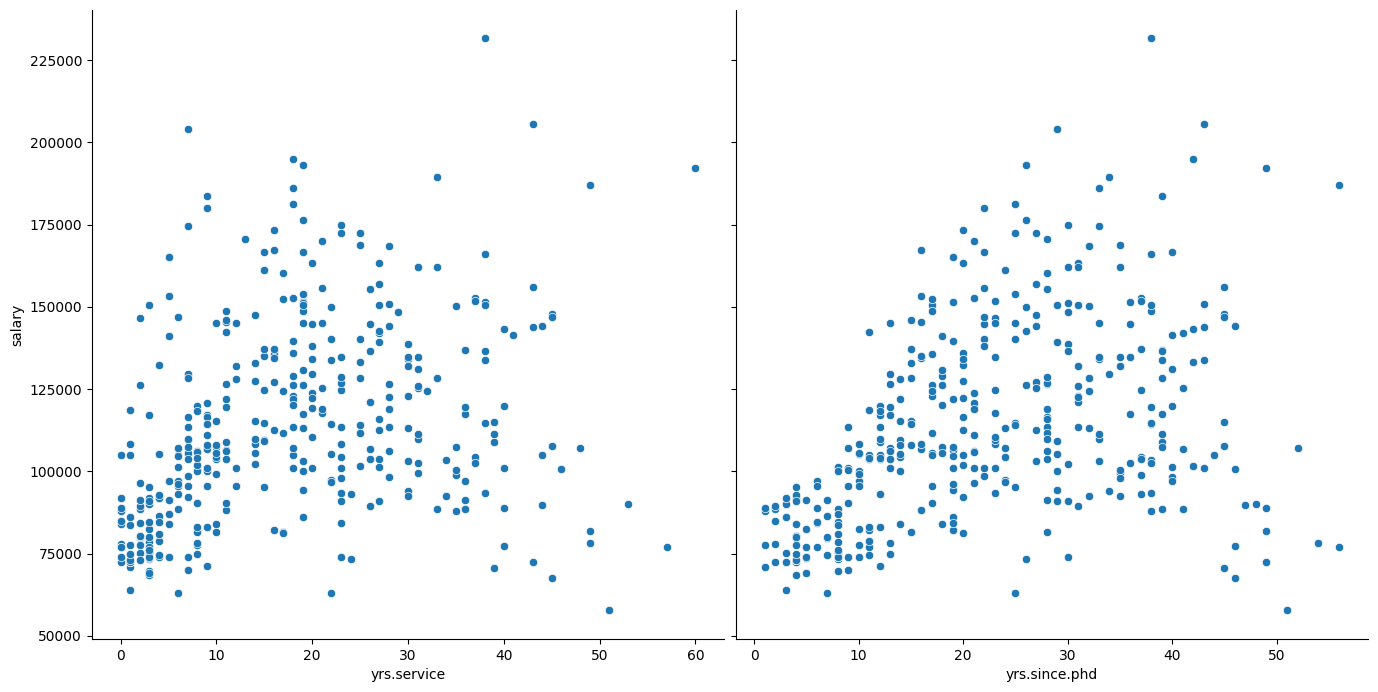

In [8]:
sns.pairplot( data = data,
             y_vars = ['salary'],
             x_vars= ['yrs.service', 'yrs.since.phd'],
              height = 7 )

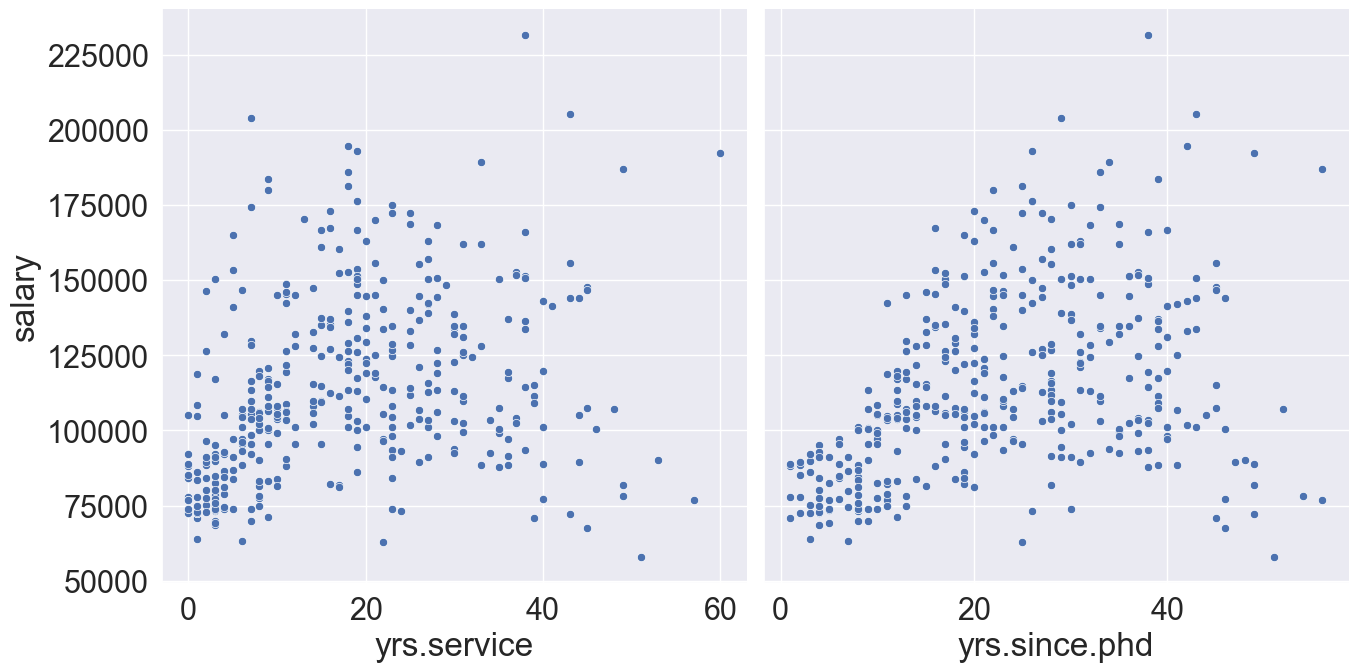

In [9]:
sns. set (font_scale=2)
sns.pairplot( data = data,
             y_vars = ['salary'],
             x_vars= ['yrs.service', 'yrs.since.phd'],
              height = 7 )

<Axes: >

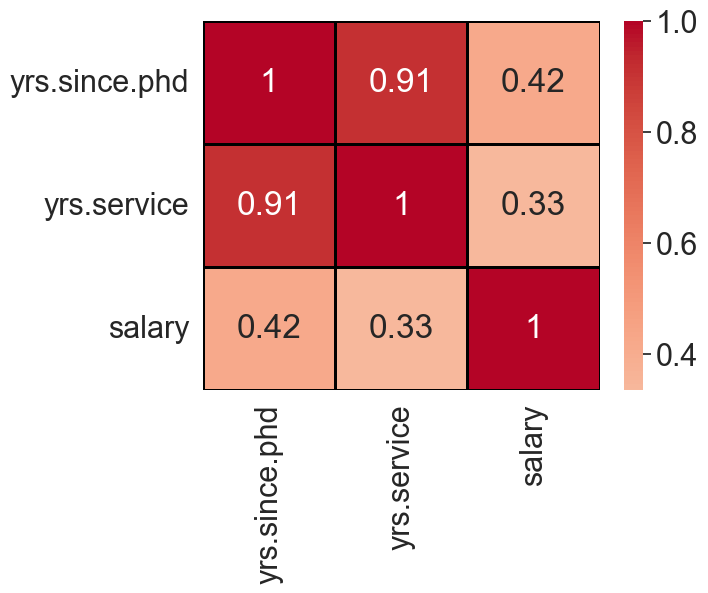

In [10]:
#Correlation Matrix
sns.heatmap(data.select_dtypes(include=['number']).corr(),
            annot=True,
            fmt='.2g',
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black')


In [11]:
data['rank'].value_counts()

rank
Prof         266
AsstProf      67
AssocProf     64
Name: count, dtype: int64

In [12]:
data['rank'].value_counts()
data.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AsstProf   A           Female      6
AssocProf  B           Female      6
AsstProf   B           Female      5
AssocProf  A           Female      4
Name: count, dtype: int64

In [13]:
categorical = data.select_dtypes(include = 'object')
categorical

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [14]:
categorical = list(data.select_dtypes(include = 'object'))
for cat in categorical:
    print(data[cat].value_counts())

rank
Prof         266
AsstProf      67
AssocProf     64
Name: count, dtype: int64
discipline
B    216
A    181
Name: count, dtype: int64
sex
Male      358
Female     39
Name: count, dtype: int64


In [15]:
#Transforms object into dummies 
data = pd.get_dummies (data = data, drop_first= True )
data.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,False,True,True,True
1,20,16,173200,False,True,True,True


In [16]:
data = pd.get_dummies(data, drop_first=True).astype(int)
data.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


# Multilinear Regression

In [17]:
#isolate X and Y
y = data.salary / 1000
y

0      139.750
1      173.200
2       79.750
3      115.000
4      141.500
        ...   
392    103.106
393    150.564
394    101.738
395     95.329
396     81.035
Name: salary, Length: 397, dtype: float64

In [18]:
x = data.drop (columns=["salary", "yrs.service"])
x.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [19]:
#add constant
X = sm.add_constant(x)
X.head()


,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1


In [20]:
#Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state = 1502
                                                    )

X_train


,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1
326,1.0,23,0,1,1,1
15,1.0,12,0,1,1,1
354,1.0,8,1,0,1,1
...,...,...,...,...,...,...
95,1.0,4,1,0,1,1
108,1.0,15,0,0,0,1
245,1.0,17,0,1,0,0
49,1.0,1,1,0,1,1


In [21]:
X_test.head(3)

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
364,1.0,43,0,1,0,1
30,1.0,20,0,1,1,1
378,1.0,38,0,1,0,1


In [24]:
#Multilinear regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     56.20
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           1.65e-41
Time:                        22:56:35   Log-Likelihood:                -1424.2
No. Observations:                 317   AIC:                             2860.
Df Residuals:                     311   BIC:                             2883.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.6855      5.408     14.735

# $$ MAE = \frac{\sum |y - \hat{y}|}{n} $$
# $$ RMSE = \sqrt{\frac{\sum (\hat{y} - y)^2}{n}} $$



**Accuracy Assessment**

In [25]:
#Predict
predictions = model.predict(X_test)
predictions[:4]

364    118.590061
30     134.868270
378    118.731635
188     99.876615
dtype: float64

In [26]:
#Accuracy Assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error (y_test, predictions)

18.221402310852046

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
round(mean_absolute_error (y_test, predictions))

18

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", round(mean_absolute_error (y_test, predictions),1))
mean_squared_error(y_test,predictions)

MAE: 18.2


666.9250227828896

In [37]:
np.sqrt(mean_squared_error(y_test,predictions))

np.float64(25.824891534774927)

In [38]:
round(np.sqrt(mean_squared_error(y_test,predictions)), 1)

np.float64(25.8)

In [39]:
"MAE: ", round(np.sqrt(mean_squared_error(y_test,predictions)), 1)

('MAE: ', np.float64(25.8))